Imports

In [3]:
import numpy as np
from sklearn.linear_model import LassoCV, RANSACRegressor, Lasso, TheilSenRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

In [4]:
def sum_squared_errors(estimator, X, y):
    return np.sum((np.reshape(estimator.predict(X), (y.shape)) - y) ** 2)

Load data

In [5]:
data_x = np.load('Xtrain_Regression2.npy')
data_y = np.load('Ytrain_Regression2.npy')

Fit a linear regression model using all the data

In [6]:
folds = 10

lasso = LassoCV(cv=folds).fit(data_x, data_y.ravel())

print(lasso.alpha_)
print(lasso.score(data_x, data_y))

0.17950930279330035
0.20824558947660365


### Finding outliers

Z values

In [7]:
x_means = data_x.mean(axis=0)
x_stds = data_x.std(axis=0)
y_mean = data_y.mean(axis=0)
y_std = data_y.std(axis=0)

x_z_scores = (data_x - x_means) / x_stds
y_z_scores = (data_y - y_mean) / y_std

x_outliers = data_x[np.abs(x_z_scores) > 2]
y_outliers = data_y[np.abs(y_z_scores) > 2]

Number of inliers found: 82
0.011
0.9656453691842101
3.9562262386609315
[0.99187704 0.9987615  0.99746319 0.99437421 0.72368839 0.9939294
 0.99532464 0.96414796 0.99891013 0.98171667]
3.8744586097684275


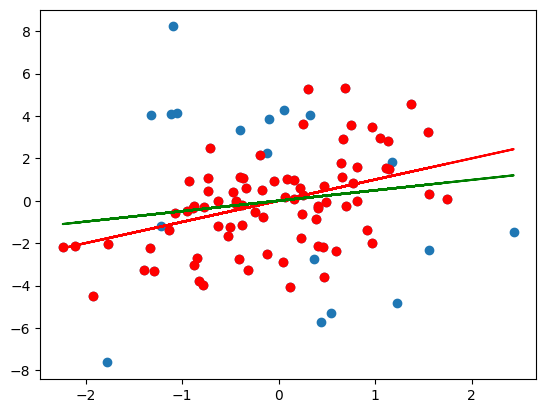

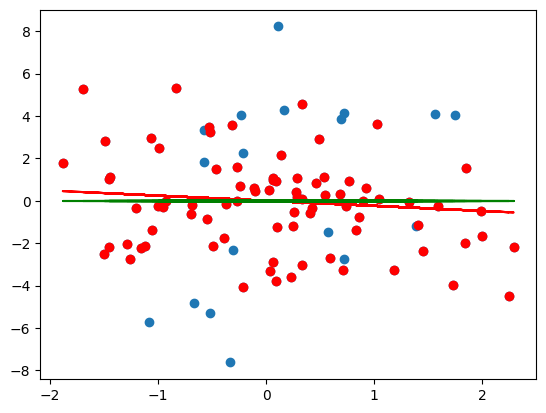

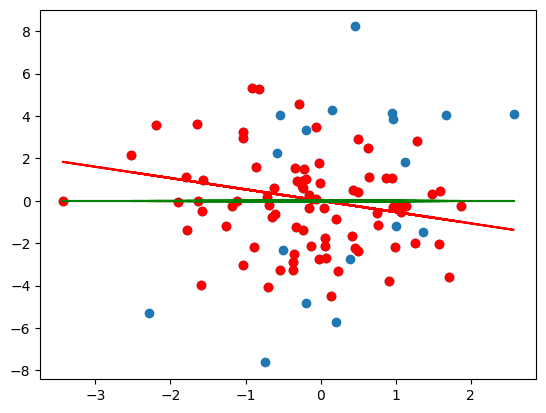

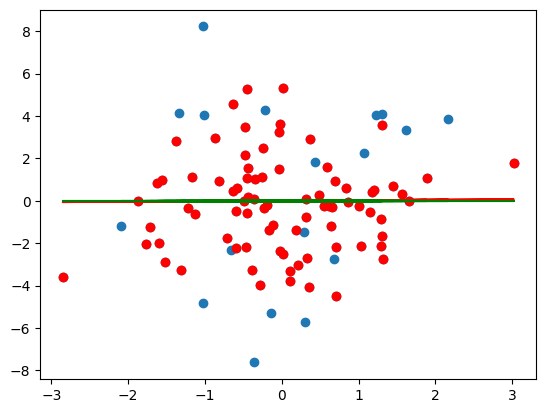

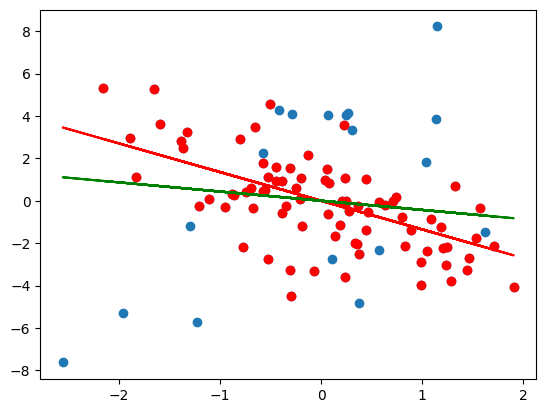

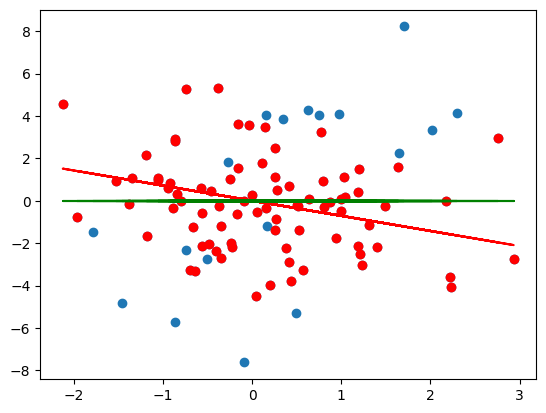

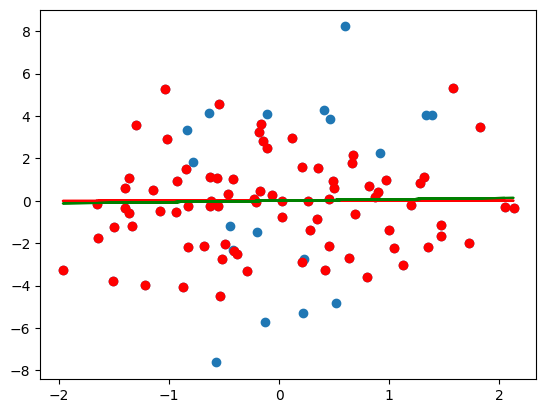

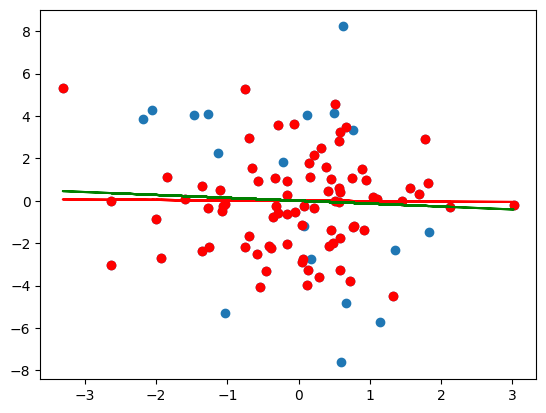

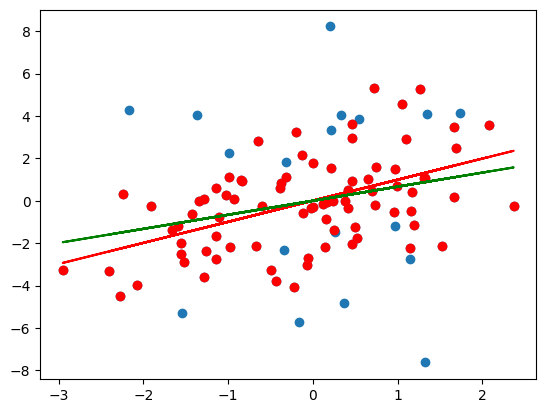

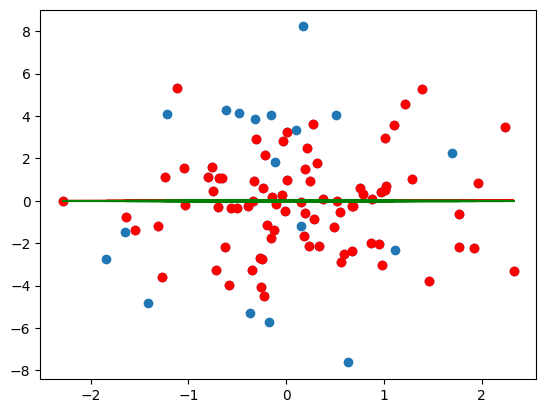

In [11]:
ransac = RANSACRegressor().fit(data_x, data_y.ravel())

cv_score = cross_val_score(ransac, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_], cv=folds)

print("Number of inliers found: %d" % ransac.inlier_mask_.sum())

model = LassoCV(cv=folds, alphas=np.arange(0.001, 1, 0.001)).fit(data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_])

print(model.alpha_)
print(cross_val_score(model, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_], cv=folds).mean())
print(sum_squared_errors(model, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_]))

print(cv_score)
print(sum_squared_errors(ransac, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_]))

for feature in range(10):
    plt.figure(feature)
    plt.scatter(data_x[:,feature], data_y)  
    plt.scatter(data_x[ransac.inlier_mask_, feature], data_y[ransac.inlier_mask_], color='red')
    plt.plot(data_x[:, feature], data_x[:, feature] * ransac.estimator_.coef_[feature], color='red')
    plt.plot(data_x[:, feature], data_x[:, feature] * lasso.coef_[feature], color='green')
    plt.show()

In [20]:
theilsen = TheilSenRegressor(max_subpopulation=90).fit(data_x, data_y.ravel())
cv_score = cross_val_score(theilsen, data_x[ransac.inlier_mask_], data_y.ravel()[ransac.inlier_mask_], cv=folds)
print(cv_score.mean()) #scores negativos (?)


0.962767943222355
